## Initial imports

In [1]:
from scm.plams import *
from ase.build import bulk as ase_build_bulk
import matplotlib.pyplot as plt
import numpy as np
init()

PLAMS working folder: /home/hellstrom/adfhome/scripting/scm/plams/doc/source/examples/BandStructure/plams_workdir


## Metal band structure relative to Fermi energy

In [2]:
Cu = fromASE(ase_build_bulk('Cu', 'fcc', a=3.6)) # primitive cell

In [3]:
s = Settings()
s.input.ams.Task = 'SinglePoint'
s.input.DFTB.Periodic.BandStructure.Enabled = 'Yes'
s.input.DFTB.Model = 'SCC-DFTB'
s.input.DFTB.ResourcesDir = 'DFTB.org/matsci-0-3'
s.runscript.nproc = 1

In [4]:
job = AMSJob(settings=s, name='Cu', molecule=Cu)
job.run();

[11.01|11:20:44] JOB Cu STARTED
[11.01|11:20:44] JOB Cu RUNNING
[11.01|11:20:50] JOB Cu FINISHED
[11.01|11:20:50] JOB Cu SUCCESSFUL


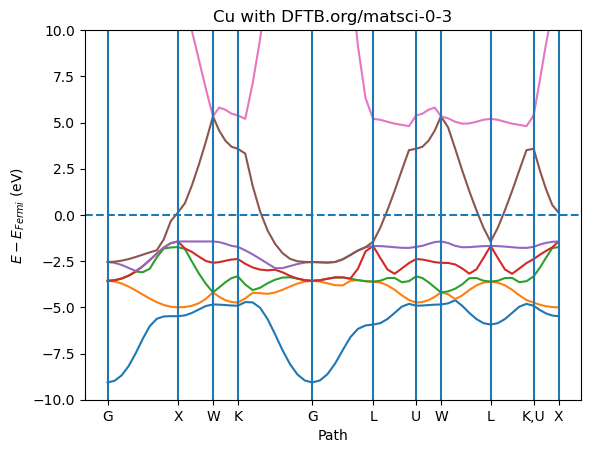

In [5]:
x, y, labels, fermi_energy = job.results.get_band_structure(unit='eV')
plot_band_structure(x, y, labels, fermi_energy, zero='fermi')
plt.ylim(-10, 10)
plt.ylabel('$E - E_{Fermi}$ (eV)')
plt.xlabel('Path')
plt.title('Cu with DFTB.org/matsci-0-3')
plt.show()

## Semiconductor band structure relative to VBM

For a semiconductor like ZnO you can also choose to put the zero at the VBM ('vbmax') or CBM ('cbmin')

In [6]:
ZnO = fromASE(ase_build_bulk('ZnO', 'wurtzite', a=3.2, c=5.3, u=0.375))
s = Settings()
s.input.ams.Task = 'SinglePoint'
s.input.DFTB.Periodic.BandStructure.Enabled = 'Yes'
s.input.DFTB.Model = 'GFN1-xTB'
s.runscript.nproc = 1
job = AMSJob(settings=s, molecule=ZnO, name='ZnO')
job.run();

[11.01|11:20:50] JOB ZnO STARTED
[11.01|11:20:50] JOB ZnO RUNNING
[11.01|11:20:53] JOB ZnO FINISHED
[11.01|11:20:53] JOB ZnO SUCCESSFUL


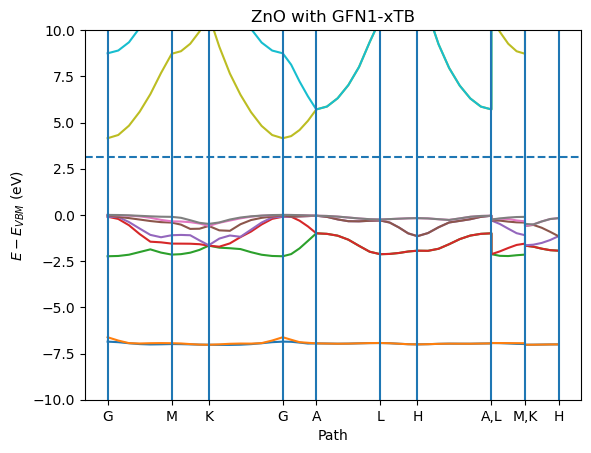

In [7]:
plot_band_structure(*job.results.get_band_structure(unit='eV'), zero='vbmax')
plt.ylim(-10, 10)
plt.ylabel('$E - E_{VBM}$ (eV)')
plt.xlabel('Path')
plt.title('ZnO with GFN1-xTB')
plt.show()